In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import pandas as pd
import numpy as np

from random import randrange

from sklearn.metrics import confusion_matrix, classification_report

# Data Training

In [10]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
df = pd.read_csv("/content/drive/MyDrive/YuuDrive/data/Salinan train_data_cl_v2.csv", header=None, names=list(range(13)))
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NaN
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S,NaN
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,NaN
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NaN,S,NaN
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S,NaN


## Data Preprocessing

In [11]:
### Benerin column
col_name = df.iloc[0,:12].values
col_name = np.insert(col_name, 4, "FirstName")

df.columns = col_name
df = df.drop(0).reset_index(drop=True)

df.head()
### Merge Name dan FirstName
df["Name"] = df["FirstName"] + " " + df["Name"]
df = df.drop("FirstName", axis=1)
df
### Perbaikan data yang tidak sesuai

print(df['Sex'].unique().tolist())
true_sex_val = ['male', 'female']
count = 0
for val in df["Sex"].values:
    if val not in true_sex_val:
        df.loc[count, 'Sex'] = np.random.choice(true_sex_val)
    count += 1
print(df['Sex'].unique().tolist())

count = 0
for val in df['Fare'].values:
    try:
        float(val)
    except ValueError:
        df.loc[count, 'Fare'] = 0
    count += 1

count = 0
for val in df['Parch'].values:
    if len(val) > 1:
        df.loc[count, 'Parch'] = 0
    count += 1

['22', '38', '26', '35', '54', '2', '27', '14', '4', '58', '20', '39', '55', '31', '34', '15', '28', '8', '19', '40', '66', '42', '21', '18', '3', '7', '49', '29', '65', '28.5', '5', '11', '45', '17', '32', '16', '25', '0.83', '30', '33', '23', '24', '46', '59', '71', '37', '47', '14.5', '70.5', '32.5', '12', '9', '36.5', '51', '55.5', '40.5', '44', '1', '61', '56', '50', '36', '45.5', '20.5', '62', '41', '52', '63', '23.5', '0.92', '43', '60', '10', '64', '13', '48', '0.75', '53', '57', '80', '70', '24.5', '6', '0.67', '30.5', '0.42', '34.5', '74']
['male', 'female']


In [12]:
### Encode
lbenc = LabelEncoder()

for i in df.columns.values:
    if df[i].dtypes == 'string':
        df[i] = lbenc.fit_transform(df[i])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"male Braund, Mr. Owen Harris",male,1,0,0,7.25,NaN,S,NaN
1,2,1,1,"female Cumings, Mrs. John Bradley (Florence Br...",female,1,0,0,71.2833,0,C,NaN
2,3,1,3,"female Heikkinen, Miss. Laina",male,0,0,0,7.925,NaN,S,NaN
3,4,1,1,"female Futrelle, Mrs. Jacques Heath (Lily May ...",female,1,0,0,53.1,0,S,NaN
4,5,0,3,"male Allen, Mr. William Henry",female,0,0,0,8.05,NaN,S,NaN


In [13]:
### Change Data Type
df.info()
df = df.astype({'PassengerId': 'int64', 'Survived': 'int64', 'Pclass': 'int64', 'SibSp': 'int64', 'Parch': 'int64'})
df = df.astype({'Name': 'string', 'Sex': 'string', 'Ticket': 'string', 'Cabin': 'string', 'Embarked': 'string'})
df = df.astype({'Age': 'float64', 'Fare': 'float64'})
df.info()
### Menghilangkan Column yang tidak dipakai
del df['Name']
del df['Ticket']
del df['Cabin']
### Cek & Replace Missing Value
missing = pd.DataFrame({
    'total' : df.isnull().sum(),
    'percent' : df.isnull().sum()/df.shape[0] * 100})

missing
df['Embarked'] = df['Embarked'].fillna(value=np.random.choice(df['Embarked'].unique().tolist()))
df['Fare'] = df['Fare'].fillna(value=0)
df.isna().sum()
clean_data = df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    object 
 1   Survived     712 non-null    object 
 2   Pclass       712 non-null    object 
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    object 
 6   SibSp        712 non-null    object 
 7   Parch        712 non-null    object 
 8   Ticket       712 non-null    object 
 9   Fare         183 non-null    object 
 10  Cabin        712 non-null    object 
 11  Embarked     0 non-null      float64
dtypes: float64(1), object(11)
memory usage: 66.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 

In [14]:
## Encode
lbenc = LabelEncoder()

for i in df.columns.values:
    if df[i].dtypes == 'string':
        df[i] = lbenc.fit_transform(df[i])

df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,1.0,0,0,0.0,0
1,2,1,1,0,1.0,0,0,0.0,0
2,3,1,3,1,0.0,0,0,0.0,0
3,4,1,1,0,1.0,0,0,0.0,0
4,5,0,3,0,0.0,0,0,0.0,0


In [15]:
### Split Feature and Label
train = df.copy()
x_train = train.iloc[:, 2:].values
y_train = df.iloc[:, 1].values
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,1.0,0,0,0.0,0
1,2,1,1,0,1.0,0,0,0.0,0
2,3,1,3,1,0.0,0,0,0.0,0
3,4,1,1,0,1.0,0,0,0.0,0
4,5,0,3,0,0.0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...
707,886,0,3,1,0.0,5,0,0.0,0
708,887,0,2,0,0.0,0,0,0.0,0
709,888,1,1,1,0.0,0,0,0.0,0
710,890,1,1,0,0.0,0,0,0.0,0


In [16]:
### Normalisasi
feature = x_train.copy()
label = y_train.copy()
label = label.reshape(-1,1)
passengerId = train.iloc[:, 0].values.reshape(-1,1)
col = train.columns.values.tolist()
col.pop(1)
col.append("Survived")

mnmx = MinMaxScaler()
feature = mnmx.fit_transform(feature)

data = np.concatenate((passengerId, feature), axis=1)
dataLabel = np.concatenate((data, label), axis=1)
normalize_data_train = pd.DataFrame(dataLabel, columns=col)

normalize_data_train.drop('PassengerId', axis=1, inplace=True)
normalize_data_train = normalize_data_train.astype({"Survived": "int64"})

X_train_normalized = normalize_data_train.iloc[:, :-1].values
y_train = normalize_data_train.iloc[:, -1].values

normalize_data_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,1.0,0.2,0.000000,0.0,0.0,0.0,0
1,0.0,0.0,0.2,0.000000,0.0,0.0,0.0,1
2,1.0,1.0,0.0,0.000000,0.0,0.0,0.0,1
3,0.0,0.0,0.2,0.000000,0.0,0.0,0.0,1
4,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...
707,1.0,1.0,0.0,0.833333,0.0,0.0,0.0,0
708,0.5,0.0,0.0,0.000000,0.0,0.0,0.0,0
709,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,1
710,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1


# Data Testing

In [17]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

dt = pd.read_csv(
    "/content/drive/MyDrive/YuuDrive/data/Salinan test_data_cl_v2.csv",
    header=None,
    names=list(range(12)),
)

gdt = pd.read_csv(
    "/content/drive/MyDrive/YuuDrive/data/Salinan test_data_GroundTruth_cl.csv"
)
dt = dt.head(331)
dt

col_name = dt.iloc[0, :11].values
col_name = np.insert(col_name, 3, "FirstName")

dt.columns = col_name
dt = dt.drop(0).reset_index(drop=True)
dt

dt["Name"] = dt["FirstName"] + " " + dt["Name"]
dt = dt.drop("FirstName", axis=1)
dt

print(dt["Sex"].unique().tolist())
true_sex_val = ["male", "female"]
count = 0
for val in dt["Sex"].values:
    if val not in true_sex_val:
        dt.loc[count, "Sex"] = np.random.choice(true_sex_val)
    count += 1
print(dt["Sex"].unique().tolist())

count = 0
for val in dt["Fare"].values:
    try:
        float(val)
    except ValueError:
        dt.loc[count, "Fare"] = 0
    count += 1

count = 0
for val in dt["Parch"].values:
    if len(val) > 1:
        dt.loc[count, "Parch"] = 0
    count += 1

dt.info()

dt = dt.astype(
    {"PassengerId": "int64", "Pclass": "int64", "SibSp": "int64", "Parch": "int64"}
)
dt = dt.astype(
    {
        "Name": "string",
        "Sex": "string",
        "Ticket": "string",
        "Cabin": "string",
        "Embarked": "string",
    }
)
dt = dt.astype({"Age": "float64", "Fare": "float64"})
dt.info()

del dt["Name"]
del dt["Ticket"]
del dt["Cabin"]

missing = pd.DataFrame(
    {"total": dt.isnull().sum(), "percent": dt.isnull().sum() / dt.shape[0] * 100}
)

missing

dt["Embarked"] = dt["Embarked"].fillna(
    value=np.random.choice(dt["Embarked"].unique().tolist())
)
dt["Fare"] = dt["Fare"].fillna(value=0)
dt.isna().sum()

['34.5', '47', '62', '27', '22', '14', '30', '26', '18', '21', '46', '23', '63', '24', '35', '45', '55', '9', '48', '50', '22.5', '41', '33', '18.5', '25', '39', '60', '36', '20', '28', '10', '17', '32', '13', '31', '29', '28.5', '32.5', '6', '67', '49', '2', '76', '43', '16', '1', '12', '42', '53', '26.5', '40', '61', '7', '15', '54', '64', '37', '34', '11.5', '8', '0.33', '38', '57', '40.5', '0.92', '19', '36.5', '0.75', '0.83', '58', '0.17', '59', '14.5', '44', '5', '51', '3']
['female', 'male']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  330 non-null    object 
 1   Pclass       330 non-null    object 
 2   Name         330 non-null    object 
 3   Sex          330 non-null    object 
 4   Age          330 non-null    object 
 5   SibSp        330 non-null    object 
 6   Parch        330 non-null    object 
 7   Ticket  

PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked       330
dtype: int64

In [18]:
lbenc = LabelEncoder()

for col in dt.columns.values:
    if dt[col].dtype == "string":
        dt[col] = lbenc.fit_transform(dt[col])

dt.head()

merged_test_data = pd.merge(dt, gdt, on="PassengerId")
merged_test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892,3,0,0.0,0,0,0.0,0,0
1,893,3,1,1.0,0,0,0.0,0,1
2,894,2,0,0.0,0,0,0.0,0,0
3,895,3,0,0.0,0,0,0.0,0,0
4,896,3,1,1.0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
325,1299,1,1,1.0,1,0,0.0,0,0
326,1301,3,1,1.0,1,0,0.0,0,1
327,1303,1,1,1.0,0,0,0.0,0,1
328,1304,3,0,0.0,0,0,0.0,0,1


In [19]:
test = merged_test_data.copy()

X_test = test.iloc[:, 1:8]
y_test = test.iloc[:, 8]

feature = X_test.copy()
label = y_test.copy().values.reshape(-1, 1)
passengerId = test.iloc[:, 0].values.reshape(-1, 1)

col = test.columns.values.tolist()
col.pop(8)

mnmx = MinMaxScaler()
feature = mnmx.fit_transform(feature)

data = np.concatenate((passengerId, feature), axis=1)
normalize_data_test = pd.DataFrame(data, columns=col)

normalize_data_test['Survived'] = y_test.values

normalize_data_test.drop('PassengerId', axis=1, inplace=True)
normalize_data_test = normalize_data_test.astype({"Survived": "int64"})

X_test_normalized = normalize_data_test.iloc[:, :-1].values
y_test = normalize_data_test.iloc[:, -1].values

normalize_data_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,0.0,0.000,0.000000,0.0,0.0,0.0,0
1,1.0,1.0,0.125,0.000000,0.0,0.0,0.0,1
2,0.5,0.0,0.000,0.000000,0.0,0.0,0.0,0
3,1.0,0.0,0.000,0.000000,0.0,0.0,0.0,0
4,1.0,1.0,0.125,0.166667,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...
325,0.0,1.0,0.125,0.166667,0.0,0.0,0.0,0
326,1.0,1.0,0.125,0.166667,0.0,0.0,0.0,1
327,0.0,1.0,0.125,0.000000,0.0,0.0,0.0,1
328,1.0,0.0,0.000,0.000000,0.0,0.0,0.0,1


In [20]:
dimensi = f'dimensi x_train\t: {X_train_normalized.shape}\ndimensi x_test\t: {X_test_normalized.shape}\ndimensi y_train\t: {y_train.shape}\ndimensi y_test\t: {y_test.shape}\n'
print(dimensi)

dimensi x_train	: (712, 7)
dimensi x_test	: (330, 7)
dimensi y_train	: (712,)
dimensi y_test	: (330,)



### Model 1

In [21]:
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

# Evaluate an algorithm without cross-validation(?) ato pake cross-validation ya?
def evaluate_algorithm(train_set, test_set, algorithm, *args):
    actual_train = [row[-1] for row in train_set]
    predicted_train = algorithm(train_set, train_set, *args)
    accuracy_train = accuracy_metric(actual_train, predicted_train)

    actual_test = [row[-1] for row in test_set]
    predicted_test = algorithm(train_set, test_set, *args)
    accuracy_test = accuracy_metric(actual_test, predicted_test)

    return accuracy_train, accuracy_test

# Make a prediction with weights
def predict(row, weights):
    activation = weights[0]
    for i in range(len(row)-1):
        activation += weights[i + 1] * row[i]
    return 1.0 if activation >= 0.0 else 0.0

# Estimate Perceptron weights using stochastic gradient descent
def train_weights(train, l_rate, n_epoch):
    weights = [0.0 for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        for row in train:
            prediction = predict(row, weights)
            error = row[-1] - prediction
            weights[0] = weights[0] + l_rate * error
            for i in range(len(row)-1):
                weights[i + 1] = weights[i + 1] + l_rate * error * row[i]

        # Print accuracy after each epoch
        train_predictions = [predict(row, weights) for row in train]
        train_actual = [row[-1] for row in train]
        train_accuracy = accuracy_metric(train_actual, train_predictions)
        # print(f'Epoch {epoch + 1}/{n_epoch}: Training Accuracy = {train_accuracy:.2f}%')

    return weights

# Perceptron Algorithm With Stochastic Gradient Descent
def perceptron(train, test, l_rate, n_epoch):
    predictions = list()
    weights = train_weights(train, l_rate, n_epoch)
    for row in test:
        prediction = predict(row, weights)
        predictions.append(prediction)
    return predictions

In [22]:
train_dataset = [list(x_train[i]) + [y_train[i]] for i in range(len(x_train))]

# Combine X_test and y_test into a test dataset
test_dataset = [list(X_test_normalized[i]) + [y_test[i]] for i in range(len(X_test_normalized))]

# Set the learning rate and number of epochs
learning_rate = 0.1
epochs = 100

# # Example: Using the perceptron algorithm without cross-validation
accuracy_train, accuracy_test = evaluate_algorithm(train_dataset, test_dataset, perceptron, learning_rate, epochs)

# for i in range(20):
#     accuracy_train, accuracy_test = evaluate_algorithm(train_dataset, test_dataset, perceptron, learning_rate, epochs)
#     print(f'\nLearning Rate: {learning_rate}')
#     print(f'Training Accuracy: {accuracy_train:.2f}%')
#     print(f'Testing Accuracy: {accuracy_test:.2f}%')
#     learning_rate = learning_rate / 1.5

# # Print the accuracy scores
print(f'Training Accuracy: {accuracy_train:.2f}%')
print(f'Testing Accuracy: {accuracy_test:.2f}%')

Training Accuracy: 60.67%
Testing Accuracy: 51.21%


### Model 2

In [23]:
class Perceptron():

    def __init__(self):
        pass

    def train(self, X, y, learning_rate=0.05, n_iters=100):
        n_samples, n_features = X.shape

        # Step 0: Initialize the parameters
        self.weights = np.zeros((n_features,1))
        self.bias = 0

        for i in range(n_iters):
            # Step 1: Compute the activation
            a = np.dot(X, self.weights) + self.bias

            # Step 2: Compute the output
            y_predict = self.step_function(a)

            # Step 3: Compute weight updates
            delta_w = learning_rate * np.dot(X.T, (y - y_predict))
            delta_b = learning_rate * np.sum(y - y_predict)

            # Step 4: Update the parameters
            self.weights += delta_w.reshape(-1, 1)
            self.bias += delta_b

        return self.weights, self.bias

    def step_function(self, x):
        return np.array([1 if elem >= 0 else 0 for elem in x])

    def predict(self, X):
        a = np.dot(X, self.weights) + self.bias
        return self.step_function(a)

In [24]:
p = Perceptron()
w_trained, b_trained = p.train(X_train_normalized, y_train)
predictions = p.predict(X_test_normalized)

In [25]:
y_p_train = p.predict(x_train)
y_p_test = p.predict(X_test_normalized)

print(f"training accuracy: {100 - np.mean(np.abs(y_p_train - y_train)) * 100}%")
print(f"test accuracy: {100 - np.mean(np.abs(y_p_test - y_test)) * 100}%")

training accuracy: 59.55056179775281%
test accuracy: 61.515151515151516%


In [26]:
print("Perceptron prediction", (predictions))

Perceptron prediction [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


# Data V2

## Data Training

In [27]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
df = pd.read_csv("//content/drive/MyDrive/YuuDrive/data/Salinan train_data_cl_v2.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Menghilangkan Column yang tidak dipakai

In [28]:
del df['Name']
del df['Ticket']
del df['Cabin']

### Cek & Replace Missing Value

In [29]:
missing = pd.DataFrame({
    'total' : df.isnull().sum(),
    'percent' : df.isnull().sum()/df.shape[0] * 100})

missing

,total,percent
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Fare,0,0.0
Embarked,0,0.0


### Encode

In [30]:
lbenc = LabelEncoder()

for i in df.columns.values:
    if df[i].dtypes == 'object':
        df[i] = lbenc.fit_transform(df[i])

df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


### Split Feature and Label


In [31]:
train = df.copy()
x_train = train.iloc[:, 2:].values
y_train = df.iloc[:, 1].values
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
707,886,0,3,0,39.0,0,5,29.1250,1
708,887,0,2,1,27.0,0,0,13.0000,2
709,888,1,1,0,19.0,0,0,30.0000,2
710,890,1,1,1,26.0,0,0,30.0000,0


### Normalisasi


In [32]:
feature = x_train.copy()
label = y_train.copy()
label = label.reshape(-1,1)
passengerId = train.iloc[:, 0].values.reshape(-1,1)
col = train.columns.values.tolist()
col.pop(1)
col.append("Survived")

mnmx = MinMaxScaler()
feature = mnmx.fit_transform(feature)

data = np.concatenate((passengerId, feature), axis=1)
dataLabel = np.concatenate((data, label), axis=1)
normalize_data_train = pd.DataFrame(dataLabel, columns=col)

normalize_data_train.drop('PassengerId', axis=1, inplace=True)
normalize_data_train = normalize_data_train.astype({"Survived": "int64"})

X_train_normalized = normalize_data_train.iloc[:, :-1].values
y_train_normalized = normalize_data_train.iloc[:, -1].values

normalize_data_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,1.0,0.271174,0.2,0.000000,0.014151,1.0,0
1,0.0,0.0,0.472229,0.2,0.000000,0.139136,0.0,1
2,1.0,0.0,0.321438,0.0,0.000000,0.015469,1.0,1
3,0.0,0.0,0.434531,0.2,0.000000,0.103644,1.0,1
4,1.0,1.0,0.434531,0.0,0.000000,0.015713,1.0,0
...,...,...,...,...,...,...,...,...
707,1.0,0.0,0.484795,0.0,0.833333,0.056848,0.5,0
708,0.5,1.0,0.334004,0.0,0.000000,0.025374,1.0,0
709,0.0,0.0,0.233476,0.0,0.000000,0.058556,1.0,1
710,0.0,1.0,0.321438,0.0,0.000000,0.058556,0.0,1


## Data Testing

In [33]:
dt = pd.read_csv("/content/drive/MyDrive/YuuDrive/data/Salinan test_data_cl_v2.csv")

gdt = pd.read_csv("/content/drive/MyDrive/YuuDrive/data/Salinan test_data_GroundTruth_cl.csv")
dt.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Menghilangkan Column yang tidak dipakai

In [34]:
del dt['Name']
del dt['Ticket']
del dt['Cabin']

### Cek & Replace Missing Value

In [35]:
missing = pd.DataFrame({
    'total' : dt.isnull().sum(),
    'percent' : dt.isnull().sum()/dt.shape[0] * 100})

missing

,total,percent
PassengerId,0,0.0
Pclass,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Fare,0,0.0
Embarked,0,0.0


### Encode


In [36]:
lbenc = LabelEncoder()

for col in dt.columns.values:
    if dt[col].dtype == "object":
        dt[col] = lbenc.fit_transform(dt[col])

dt.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.5,0,0,7.8292,1
1,893,3,0,47.0,1,0,7.0000,2
2,894,2,1,62.0,0,0,9.6875,1
3,895,3,1,27.0,0,0,8.6625,2
4,896,3,0,22.0,1,1,12.2875,2


### Merge data test and ground truth

In [37]:
merged_test_data = pd.merge(dt, gdt, on="PassengerId")
merged_test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892,3,1,34.5,0,0,7.8292,1,0
1,893,3,0,47.0,1,0,7.0000,2,1
2,894,2,1,62.0,0,0,9.6875,1,0
3,895,3,1,27.0,0,0,8.6625,2,0
4,896,3,0,22.0,1,1,12.2875,2,1
...,...,...,...,...,...,...,...,...,...
326,1301,3,0,3.0,1,1,13.7750,2,1
327,1303,1,0,37.0,1,0,90.0000,1,1
328,1304,3,0,28.0,0,0,7.7750,2,1
329,1306,1,0,39.0,0,0,108.9000,0,1


### Split Feature and Label


In [38]:
test = merged_test_data.copy()

X_test = test.iloc[:, 1:8]
y_test = test.iloc[:, 8]

### Normalisasi


In [39]:
feature = X_test.copy()
label = y_test.copy().values.reshape(-1, 1)
passengerId = test.iloc[:, 0].values.reshape(-1, 1)

col = test.columns.values.tolist()
col.pop(8)

mnmx = MinMaxScaler()
feature = mnmx.fit_transform(feature)

data = np.concatenate((passengerId, feature), axis=1)
normalize_data_test = pd.DataFrame(data, columns=col)

normalize_data_test['Survived'] = y_test.values

normalize_data_test.drop('PassengerId', axis=1, inplace=True)
normalize_data_test = normalize_data_test.astype({"Survived": "int64"})

X_test_normalized = normalize_data_test.iloc[:, :-1].values
y_test_normalized = normalize_data_test.iloc[:, -1].values

normalize_data_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1.0,1.0,0.452723,0.000,0.000000,0.015282,0.5,0
1,1.0,0.0,0.617566,0.125,0.000000,0.013663,1.0,1
2,0.5,1.0,0.815377,0.000,0.000000,0.018909,0.5,0
3,1.0,1.0,0.353818,0.000,0.000000,0.016908,1.0,0
4,1.0,0.0,0.287881,0.125,0.166667,0.023984,1.0,1
...,...,...,...,...,...,...,...,...
326,1.0,0.0,0.037320,0.125,0.166667,0.026887,1.0,1
327,0.0,0.0,0.485692,0.125,0.000000,0.175668,0.5,1
328,1.0,0.0,0.367005,0.000,0.000000,0.015176,1.0,1
329,0.0,0.0,0.512066,0.000,0.000000,0.212559,0.0,1


## Model 3

In [40]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

class Perceptron(object):
    def __init__(self, X_dim, activation='sigmoid'):
        if activation == 'sigmoid':
            self.activation = sigmoid
            self.activation_deriv = sigmoid_derivative
        else:
            raise ValueError('Unknown activation function %s' % activation)

        nweights = X_dim + 1
        self.W = (2 * np.random.random(nweights) - 1) * 0.25
        self.W = self.W.reshape(-1, 1)
        self.train_errors = []
        self.testing_errors = []

    def _add_bias_X(self, X):
        """Returns X with an additional entry set to 1, representing bias"""
        temp = np.ones([X.shape[0], X.shape[1]+1])
        temp[:, :-1] = X
        return temp

    def _error_derivative(self, y_true, y_pred, y_pred_prime):
        return -2 * (y_true - y_pred) * y_pred_prime

    def _error(self, y_true, y_pred):
        return (y_true - y_pred)**2

    def train(self, X_train, y_train, X_validation, y_validation,
              learning_rate=0.01, epochs=10, minibatch_size=10, weight_decay=0):
        X_train = self._add_bias_X(X_train)
        X_validation = self._add_bias_X(X_validation)

        self.weight_decay = weight_decay

        for epoch in range(epochs):
            minibatch_indices = np.arange(X_train.shape[0])
            np.random.shuffle(minibatch_indices)
            # for each minibatch, compute gradient of weights
            for start in range(0, len(minibatch_indices), minibatch_size):
                end = start + minibatch_size
                indices = minibatch_indices[start:end]
                Xb = X_train[indices]
                yb = y_train[indices]

                l = Xb.dot(self.W).flatten()
                deltas = self._error_derivative(yb, self.activation(l), self.activation_deriv(l))
                grad_W = Xb.T.dot(deltas).reshape(-1, 1) / minibatch_size
                self.W -= learning_rate * grad_W + self.weight_decay * self.W

            # evaluate train/validation errors
            self.train_errors.append(
                self._error(y_train, self.decision_function(X_train, addbias=False)).mean()
            )
            self.testing_errors.append(
                self._error(y_validation, self.decision_function(X_validation, addbias=False)).mean()
            )

        return self

    def predict(self, X, addbias=True):
        return (self.decision_function(X, addbias) > 0.5).astype(np.int64)

    def decision_function(self, X, addbias=True):
        """
        - if addbias is True, an entry with 1 will be added to X to represent the bias.
        """
        if addbias:
            X = self._add_bias_X(X)
        return self.activation(X.dot(self.W).flatten())

In [41]:
perceptron = Perceptron(x_train.shape[1]).train(x_train, y_train, X_test_normalized, y_test_normalized,
                                          epochs=100, minibatch_size=10)

In [42]:
def calculate_accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    total_samples = len(y_true)
    accuracy = correct_predictions / total_samples
    return accuracy

# Assuming 'perceptron' is an instance of your trained Perceptron
y_train_pred = perceptron.predict(x_train)
train_accuracy = calculate_accuracy(y_train, y_train_pred)

y_test_pred = perceptron.predict(X_test_normalized)
testing_accuracy = calculate_accuracy(y_test_normalized, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2%}")
print(f"Test Accuracy: {testing_accuracy:.2%}")

Training Accuracy: 72.75%
Test Accuracy: 99.09%


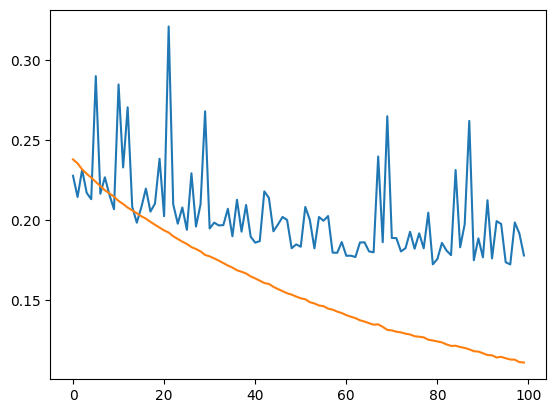

In [43]:
import pylab as pl
pl.plot(perceptron.train_errors, label='train')
pl.plot(perceptron.testing_errors, label='test')

# Experiment Epoch 50-1500

### Epoch 50

In [44]:
class SingleLayerPerceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=50):
        self.weights = np.zeros(input_size + 1)  # Additional weight for bias
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.training_accuracies = []
        self.testing_accuracies = []

    def _activation_function(self, x):
        # Using a simple step function as the activation function
        return 1 if x >= 0 else 0

    def _predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self._activation_function(summation)

    def _calculate_accuracy(self, X, y):
        predictions = self.predict(X)
        accuracy = np.mean(predictions == y)
        return accuracy * 100

    def train(self, X_train, y_train, X_test, y_test):
        for epoch in range(self.epochs):
            for inputs, label in zip(X_train, y_train):
                prediction = self._predict(inputs)
                error = label - prediction

                # Update weights
                self.weights[1:] += self.learning_rate * error * inputs
                self.weights[0] += self.learning_rate * error
            # Calculate training accuracy at each epoch
            training_accuracy = self._calculate_accuracy(X_train, y_train)
            self.training_accuracies.append(training_accuracy)

            # Calculate testing accuracy at each epoch
            testing_accuracy = self._calculate_accuracy(X_test, y_test)
            self.testing_accuracies.append(testing_accuracy)

            # Calculate training accuracy at each epoch
            training_accuracy = self._calculate_accuracy(X_train, y_train)
            print(f"Epoch {epoch + 1}/{self.epochs}: Training Accuracy = {training_accuracy:.2f}%")

        # Print final training accuracy
        final_training_accuracy = self._calculate_accuracy(X_train, y_train)
        print(f"\nFinal Training Accuracy = {final_training_accuracy:.2f}%")

        # Print test accuracy
        test_accuracy = self._calculate_accuracy(X_test, y_test)
        print(f"Test Accuracy = {test_accuracy:.2f}%")

    def predict(self, X_test):
        predictions = [self._predict(inputs) for inputs in X_test]
        return np.array(predictions)

In [45]:
input_size = x_train.shape[1]
perceptron = SingleLayerPerceptron(input_size)
perceptron.train(x_train, y_train, X_test_normalized, y_test)

Epoch 1/50: Training Accuracy = 68.54%
Epoch 2/50: Training Accuracy = 69.24%
Epoch 3/50: Training Accuracy = 69.66%
Epoch 4/50: Training Accuracy = 69.66%
Epoch 5/50: Training Accuracy = 69.66%
Epoch 6/50: Training Accuracy = 69.24%
Epoch 7/50: Training Accuracy = 69.66%
Epoch 8/50: Training Accuracy = 69.80%
Epoch 9/50: Training Accuracy = 67.42%
Epoch 10/50: Training Accuracy = 67.70%
Epoch 11/50: Training Accuracy = 65.59%
Epoch 12/50: Training Accuracy = 66.15%
Epoch 13/50: Training Accuracy = 67.13%
Epoch 14/50: Training Accuracy = 69.94%
Epoch 15/50: Training Accuracy = 67.84%
Epoch 16/50: Training Accuracy = 69.24%
Epoch 17/50: Training Accuracy = 72.33%
Epoch 18/50: Training Accuracy = 73.17%
Epoch 19/50: Training Accuracy = 75.98%
Epoch 20/50: Training Accuracy = 75.98%
Epoch 21/50: Training Accuracy = 73.60%
Epoch 22/50: Training Accuracy = 73.31%
Epoch 23/50: Training Accuracy = 74.02%
Epoch 24/50: Training Accuracy = 72.33%
Epoch 25/50: Training Accuracy = 71.63%
Epoch 26/

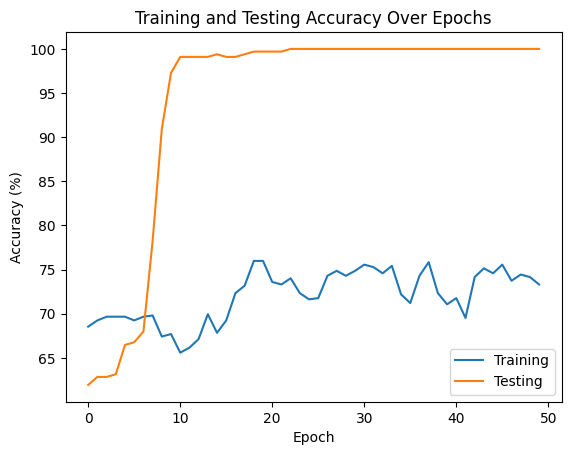

In [46]:
import pylab as pl
# Visualisasi hasil akurasi
pl.plot(perceptron.training_accuracies, label='Training')
pl.plot(perceptron.testing_accuracies, label='Testing')
pl.xlabel('Epoch')
pl.ylabel('Accuracy (%)')
pl.title('Training and Testing Accuracy Over Epochs')
pl.legend()
pl.show()

In [47]:
predictions = perceptron.predict(X_test_normalized)
print(predictions)

[0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1
 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0
 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0
 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1
 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1
 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0]


### Epoch 100

In [48]:
class SingleLayerPerceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=100):
        self.weights = np.zeros(input_size + 1)  # Additional weight for bias
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.training_accuracies = []
        self.testing_accuracies = []

    def _activation_function(self, x):
        # Using a simple step function as the activation function
        return 1 if x >= 0 else 0

    def _predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self._activation_function(summation)

    def _calculate_accuracy(self, X, y):
        predictions = self.predict(X)
        accuracy = np.mean(predictions == y)
        return accuracy * 100

    def train(self, X_train, y_train, X_test, y_test):
        for epoch in range(self.epochs):
            for inputs, label in zip(X_train, y_train):
                prediction = self._predict(inputs)
                error = label - prediction

                # Update weights
                self.weights[1:] += self.learning_rate * error * inputs
                self.weights[0] += self.learning_rate * error
            # Calculate training accuracy at each epoch
            training_accuracy = self._calculate_accuracy(X_train, y_train)
            self.training_accuracies.append(training_accuracy)

            # Calculate testing accuracy at each epoch
            testing_accuracy = self._calculate_accuracy(X_test, y_test)
            self.testing_accuracies.append(testing_accuracy)

            # Calculate training accuracy at each epoch
            training_accuracy = self._calculate_accuracy(X_train, y_train)
            print(f"Epoch {epoch + 1}/{self.epochs}: Training Accuracy = {training_accuracy:.2f}%")

        # Print final training accuracy
        final_training_accuracy = self._calculate_accuracy(X_train, y_train)
        print(f"\nFinal Training Accuracy = {final_training_accuracy:.2f}%")

        # Print test accuracy
        test_accuracy = self._calculate_accuracy(X_test, y_test)
        print(f"Test Accuracy = {test_accuracy:.2f}%")

    def predict(self, X_test):
        predictions = [self._predict(inputs) for inputs in X_test]
        return np.array(predictions)

In [49]:
input_size = x_train.shape[1]
perceptron = SingleLayerPerceptron(input_size)
perceptron.train(x_train, y_train, X_test_normalized, y_test)

Epoch 1/100: Training Accuracy = 68.54%
Epoch 2/100: Training Accuracy = 69.24%
Epoch 3/100: Training Accuracy = 69.66%
Epoch 4/100: Training Accuracy = 69.66%
Epoch 5/100: Training Accuracy = 69.66%
Epoch 6/100: Training Accuracy = 69.24%
Epoch 7/100: Training Accuracy = 69.66%
Epoch 8/100: Training Accuracy = 69.80%
Epoch 9/100: Training Accuracy = 67.42%
Epoch 10/100: Training Accuracy = 67.70%
Epoch 11/100: Training Accuracy = 65.59%
Epoch 12/100: Training Accuracy = 66.15%
Epoch 13/100: Training Accuracy = 67.13%
Epoch 14/100: Training Accuracy = 69.94%
Epoch 15/100: Training Accuracy = 67.84%
Epoch 16/100: Training Accuracy = 69.24%
Epoch 17/100: Training Accuracy = 72.33%
Epoch 18/100: Training Accuracy = 73.17%
Epoch 19/100: Training Accuracy = 75.98%
Epoch 20/100: Training Accuracy = 75.98%
Epoch 21/100: Training Accuracy = 73.60%
Epoch 22/100: Training Accuracy = 73.31%
Epoch 23/100: Training Accuracy = 74.02%
Epoch 24/100: Training Accuracy = 72.33%
Epoch 25/100: Training Ac

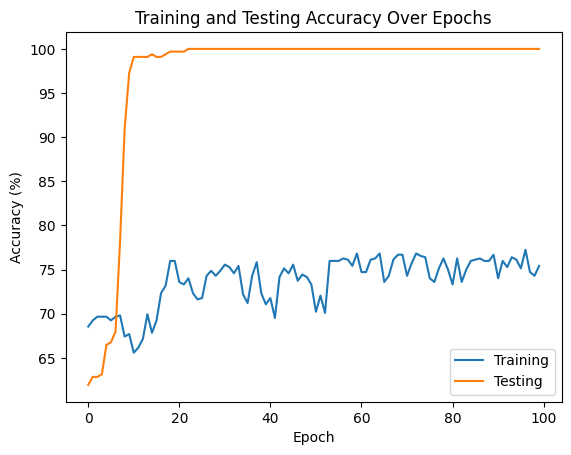

In [50]:
import pylab as pl
# Visualisasi hasil akurasi
pl.plot(perceptron.training_accuracies, label='Training')
pl.plot(perceptron.testing_accuracies, label='Testing')
pl.xlabel('Epoch')
pl.ylabel('Accuracy (%)')
pl.title('Training and Testing Accuracy Over Epochs')
pl.legend()
pl.show()

In [51]:
predictions = perceptron.predict(X_test_normalized)
print(predictions)

[0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1
 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0
 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0
 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1
 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1
 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0]


### Epoch 250

In [52]:
class SingleLayerPerceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=250):
        self.weights = np.zeros(input_size + 1)  # Additional weight for bias
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.training_accuracies = []
        self.testing_accuracies = []

    def _activation_function(self, x):
        # Using a simple step function as the activation function
        return 1 if x >= 0 else 0

    def _predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self._activation_function(summation)

    def _calculate_accuracy(self, X, y):
        predictions = self.predict(X)
        accuracy = np.mean(predictions == y)
        return accuracy * 100

    def train(self, X_train, y_train, X_test, y_test):
        for epoch in range(self.epochs):
            for inputs, label in zip(X_train, y_train):
                prediction = self._predict(inputs)
                error = label - prediction

                # Update weights
                self.weights[1:] += self.learning_rate * error * inputs
                self.weights[0] += self.learning_rate * error
            # Calculate training accuracy at each epoch
            training_accuracy = self._calculate_accuracy(X_train, y_train)
            self.training_accuracies.append(training_accuracy)

            # Calculate testing accuracy at each epoch
            testing_accuracy = self._calculate_accuracy(X_test, y_test)
            self.testing_accuracies.append(testing_accuracy)

            # Calculate training accuracy at each epoch
            training_accuracy = self._calculate_accuracy(X_train, y_train)
            print(f"Epoch {epoch + 1}/{self.epochs}: Training Accuracy = {training_accuracy:.2f}%")

        # Print final training accuracy
        final_training_accuracy = self._calculate_accuracy(X_train, y_train)
        print(f"\nFinal Training Accuracy = {final_training_accuracy:.2f}%")

        # Print test accuracy
        test_accuracy = self._calculate_accuracy(X_test, y_test)
        print(f"Test Accuracy = {test_accuracy:.2f}%")

    def predict(self, X_test):
        predictions = [self._predict(inputs) for inputs in X_test]
        return np.array(predictions)

In [53]:
input_size = x_train.shape[1]
perceptron = SingleLayerPerceptron(input_size)
perceptron.train(x_train, y_train, X_test_normalized, y_test)

Epoch 1/250: Training Accuracy = 68.54%
Epoch 2/250: Training Accuracy = 69.24%
Epoch 3/250: Training Accuracy = 69.66%
Epoch 4/250: Training Accuracy = 69.66%
Epoch 5/250: Training Accuracy = 69.66%
Epoch 6/250: Training Accuracy = 69.24%
Epoch 7/250: Training Accuracy = 69.66%
Epoch 8/250: Training Accuracy = 69.80%
Epoch 9/250: Training Accuracy = 67.42%
Epoch 10/250: Training Accuracy = 67.70%
Epoch 11/250: Training Accuracy = 65.59%
Epoch 12/250: Training Accuracy = 66.15%
Epoch 13/250: Training Accuracy = 67.13%
Epoch 14/250: Training Accuracy = 69.94%
Epoch 15/250: Training Accuracy = 67.84%
Epoch 16/250: Training Accuracy = 69.24%
Epoch 17/250: Training Accuracy = 72.33%
Epoch 18/250: Training Accuracy = 73.17%
Epoch 19/250: Training Accuracy = 75.98%
Epoch 20/250: Training Accuracy = 75.98%
Epoch 21/250: Training Accuracy = 73.60%
Epoch 22/250: Training Accuracy = 73.31%
Epoch 23/250: Training Accuracy = 74.02%
Epoch 24/250: Training Accuracy = 72.33%
Epoch 25/250: Training Ac

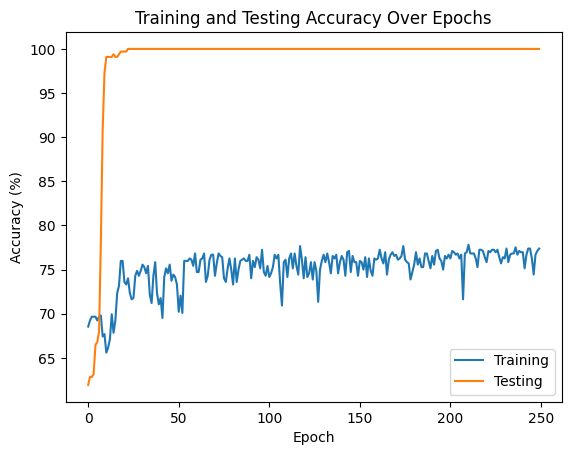

In [54]:
import pylab as pl
# Visualisasi hasil akurasi
pl.plot(perceptron.training_accuracies, label='Training')
pl.plot(perceptron.testing_accuracies, label='Testing')
pl.xlabel('Epoch')
pl.ylabel('Accuracy (%)')
pl.title('Training and Testing Accuracy Over Epochs')
pl.legend()
pl.show()

In [55]:
predictions = perceptron.predict(X_test_normalized)
print(predictions)

[0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1
 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0
 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0
 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1
 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1
 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0]


### Epoch 500

In [56]:
class SingleLayerPerceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=500):
        self.weights = np.zeros(input_size + 1)  # Additional weight for bias
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.training_accuracies = []
        self.testing_accuracies = []

    def _activation_function(self, x):
        # Using a simple step function as the activation function
        return 1 if x >= 0 else 0

    def _predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self._activation_function(summation)

    def _calculate_accuracy(self, X, y):
        predictions = self.predict(X)
        accuracy = np.mean(predictions == y)
        return accuracy * 100

    def train(self, X_train, y_train, X_test, y_test):
        for epoch in range(self.epochs):
            for inputs, label in zip(X_train, y_train):
                prediction = self._predict(inputs)
                error = label - prediction

                # Update weights
                self.weights[1:] += self.learning_rate * error * inputs
                self.weights[0] += self.learning_rate * error
            # Calculate training accuracy at each epoch
            training_accuracy = self._calculate_accuracy(X_train, y_train)
            self.training_accuracies.append(training_accuracy)

            # Calculate testing accuracy at each epoch
            testing_accuracy = self._calculate_accuracy(X_test, y_test)
            self.testing_accuracies.append(testing_accuracy)

            # Calculate training accuracy at each epoch
            training_accuracy = self._calculate_accuracy(X_train, y_train)
            print(f"Epoch {epoch + 1}/{self.epochs}: Training Accuracy = {training_accuracy:.2f}%")

        # Print final training accuracy
        final_training_accuracy = self._calculate_accuracy(X_train, y_train)
        print(f"\nFinal Training Accuracy = {final_training_accuracy:.2f}%")

        # Print test accuracy
        test_accuracy = self._calculate_accuracy(X_test, y_test)
        print(f"Test Accuracy = {test_accuracy:.2f}%")

    def predict(self, X_test):
        predictions = [self._predict(inputs) for inputs in X_test]
        return np.array(predictions)

In [57]:
input_size = x_train.shape[1]
perceptron = SingleLayerPerceptron(input_size)
perceptron.train(x_train, y_train, X_test_normalized, y_test)

Epoch 1/500: Training Accuracy = 68.54%
Epoch 2/500: Training Accuracy = 69.24%
Epoch 3/500: Training Accuracy = 69.66%
Epoch 4/500: Training Accuracy = 69.66%
Epoch 5/500: Training Accuracy = 69.66%
Epoch 6/500: Training Accuracy = 69.24%
Epoch 7/500: Training Accuracy = 69.66%
Epoch 8/500: Training Accuracy = 69.80%
Epoch 9/500: Training Accuracy = 67.42%
Epoch 10/500: Training Accuracy = 67.70%
Epoch 11/500: Training Accuracy = 65.59%
Epoch 12/500: Training Accuracy = 66.15%
Epoch 13/500: Training Accuracy = 67.13%
Epoch 14/500: Training Accuracy = 69.94%
Epoch 15/500: Training Accuracy = 67.84%
Epoch 16/500: Training Accuracy = 69.24%
Epoch 17/500: Training Accuracy = 72.33%
Epoch 18/500: Training Accuracy = 73.17%
Epoch 19/500: Training Accuracy = 75.98%
Epoch 20/500: Training Accuracy = 75.98%
Epoch 21/500: Training Accuracy = 73.60%
Epoch 22/500: Training Accuracy = 73.31%
Epoch 23/500: Training Accuracy = 74.02%
Epoch 24/500: Training Accuracy = 72.33%
Epoch 25/500: Training Ac

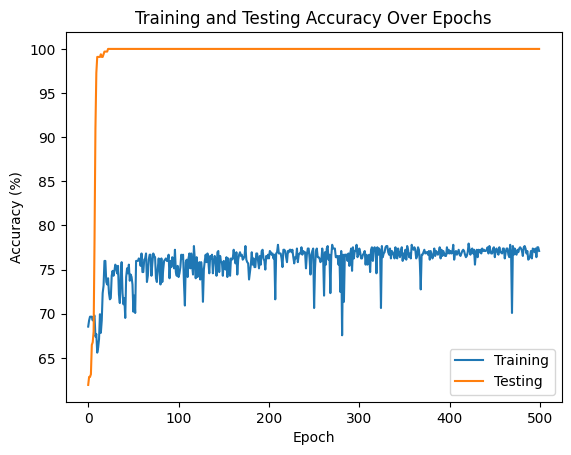

In [58]:
import pylab as pl
# Visualisasi hasil akurasi
pl.plot(perceptron.training_accuracies, label='Training')
pl.plot(perceptron.testing_accuracies, label='Testing')
pl.xlabel('Epoch')
pl.ylabel('Accuracy (%)')
pl.title('Training and Testing Accuracy Over Epochs')
pl.legend()
pl.show()

In [59]:
predictions = perceptron.predict(X_test_normalized)
print(predictions)

[0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1
 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0
 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0
 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1
 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1
 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0]


### Epoch 550

In [60]:
class SingleLayerPerceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=550):
        self.weights = np.zeros(input_size + 1)  # Additional weight for bias
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.training_accuracies = []
        self.testing_accuracies = []

    def _activation_function(self, x):
        # Using a simple step function as the activation function
        return 1 if x >= 0 else 0

    def _predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self._activation_function(summation)

    def _calculate_accuracy(self, X, y):
        predictions = self.predict(X)
        accuracy = np.mean(predictions == y)
        return accuracy * 100

    def train(self, X_train, y_train, X_test, y_test):
        for epoch in range(self.epochs):
            for inputs, label in zip(X_train, y_train):
                prediction = self._predict(inputs)
                error = label - prediction

                # Update weights
                self.weights[1:] += self.learning_rate * error * inputs
                self.weights[0] += self.learning_rate * error
            # Calculate training accuracy at each epoch
            training_accuracy = self._calculate_accuracy(X_train, y_train)
            self.training_accuracies.append(training_accuracy)

            # Calculate testing accuracy at each epoch
            testing_accuracy = self._calculate_accuracy(X_test, y_test)
            self.testing_accuracies.append(testing_accuracy)

            # Calculate training accuracy at each epoch
            training_accuracy = self._calculate_accuracy(X_train, y_train)
            print(f"Epoch {epoch + 1}/{self.epochs}: Training Accuracy = {training_accuracy:.2f} Testing Accuracy= {testing_accuracy:.2f}%")

        # Print final training accuracy
        final_training_accuracy = self._calculate_accuracy(X_train, y_train)
        print(f"\nFinal Training Accuracy = {final_training_accuracy:.2f}%")

        # Print test accuracy
        test_accuracy = self._calculate_accuracy(X_test, y_test)
        print(f"Test Accuracy = {test_accuracy:.2f}%")

    def predict(self, X_test):
        predictions = [self._predict(inputs) for inputs in X_test]
        return np.array(predictions)

In [61]:
input_size = x_train.shape[1]
perceptron = SingleLayerPerceptron(input_size)
perceptron.train(x_train, y_train, X_test_normalized, y_test)

Epoch 1/550: Training Accuracy = 68.54 Testing Accuracy= 61.93%
Epoch 2/550: Training Accuracy = 69.24 Testing Accuracy= 62.84%
Epoch 3/550: Training Accuracy = 69.66 Testing Accuracy= 62.84%
Epoch 4/550: Training Accuracy = 69.66 Testing Accuracy= 63.14%
Epoch 5/550: Training Accuracy = 69.66 Testing Accuracy= 66.47%
Epoch 6/550: Training Accuracy = 69.24 Testing Accuracy= 66.77%
Epoch 7/550: Training Accuracy = 69.66 Testing Accuracy= 67.98%
Epoch 8/550: Training Accuracy = 69.80 Testing Accuracy= 78.25%
Epoch 9/550: Training Accuracy = 67.42 Testing Accuracy= 90.94%
Epoch 10/550: Training Accuracy = 67.70 Testing Accuracy= 97.28%
Epoch 11/550: Training Accuracy = 65.59 Testing Accuracy= 99.09%
Epoch 12/550: Training Accuracy = 66.15 Testing Accuracy= 99.09%
Epoch 13/550: Training Accuracy = 67.13 Testing Accuracy= 99.09%
Epoch 14/550: Training Accuracy = 69.94 Testing Accuracy= 99.09%
Epoch 15/550: Training Accuracy = 67.84 Testing Accuracy= 99.40%
Epoch 16/550: Training Accuracy = 

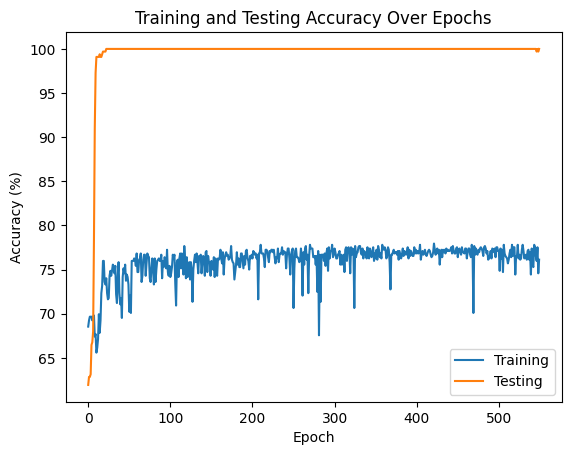

In [62]:
import pylab as pl
# Visualisasi hasil akurasi
pl.plot(perceptron.training_accuracies, label='Training')
pl.plot(perceptron.testing_accuracies, label='Testing')
pl.xlabel('Epoch')
pl.ylabel('Accuracy (%)')
pl.title('Training and Testing Accuracy Over Epochs')
pl.legend()
pl.show()

In [63]:
predictions = perceptron.predict(X_test_normalized)
print(predictions)

[0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1
 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 1 0
 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0
 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1
 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1
 1 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0]


### Epoch 600

In [64]:
class SingleLayerPerceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=600):
        self.weights = np.zeros(input_size + 1)  # Additional weight for bias
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.training_accuracies = []
        self.testing_accuracies = []

    def _activation_function(self, x):
        # Using a simple step function as the activation function
        return 1 if x >= 0 else 0

    def _predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self._activation_function(summation)

    def _calculate_accuracy(self, X, y):
        predictions = self.predict(X)
        accuracy = np.mean(predictions == y)
        return accuracy * 100

    def train(self, X_train, y_train, X_test, y_test):
        for epoch in range(self.epochs):
            for inputs, label in zip(X_train, y_train):
                prediction = self._predict(inputs)
                error = label - prediction

                # Update weights
                self.weights[1:] += self.learning_rate * error * inputs
                self.weights[0] += self.learning_rate * error
            # Calculate training accuracy at each epoch
            training_accuracy = self._calculate_accuracy(X_train, y_train)
            self.training_accuracies.append(training_accuracy)

            # Calculate testing accuracy at each epoch
            testing_accuracy = self._calculate_accuracy(X_test, y_test)
            self.testing_accuracies.append(testing_accuracy)

            # Calculate training accuracy at each epoch
            training_accuracy = self._calculate_accuracy(X_train, y_train)
            print(f"Epoch {epoch + 1}/{self.epochs}: Training Accuracy = {training_accuracy:.2f} Testing Accuracy= {testing_accuracy:.2f}%")

        # Print final training accuracy
        final_training_accuracy = self._calculate_accuracy(X_train, y_train)
        print(f"\nFinal Training Accuracy = {final_training_accuracy:.2f}%")

        # Print test accuracy
        test_accuracy = self._calculate_accuracy(X_test, y_test)
        print(f"Test Accuracy = {test_accuracy:.2f}%")

    def predict(self, X_test):
        predictions = [self._predict(inputs) for inputs in X_test]
        return np.array(predictions)

In [65]:
input_size = x_train.shape[1]
perceptron = SingleLayerPerceptron(input_size)
perceptron.train(x_train, y_train, X_test_normalized, y_test)

Epoch 1/600: Training Accuracy = 68.54 Testing Accuracy= 61.93%
Epoch 2/600: Training Accuracy = 69.24 Testing Accuracy= 62.84%
Epoch 3/600: Training Accuracy = 69.66 Testing Accuracy= 62.84%
Epoch 4/600: Training Accuracy = 69.66 Testing Accuracy= 63.14%
Epoch 5/600: Training Accuracy = 69.66 Testing Accuracy= 66.47%
Epoch 6/600: Training Accuracy = 69.24 Testing Accuracy= 66.77%
Epoch 7/600: Training Accuracy = 69.66 Testing Accuracy= 67.98%
Epoch 8/600: Training Accuracy = 69.80 Testing Accuracy= 78.25%
Epoch 9/600: Training Accuracy = 67.42 Testing Accuracy= 90.94%
Epoch 10/600: Training Accuracy = 67.70 Testing Accuracy= 97.28%
Epoch 11/600: Training Accuracy = 65.59 Testing Accuracy= 99.09%
Epoch 12/600: Training Accuracy = 66.15 Testing Accuracy= 99.09%
Epoch 13/600: Training Accuracy = 67.13 Testing Accuracy= 99.09%
Epoch 14/600: Training Accuracy = 69.94 Testing Accuracy= 99.09%
Epoch 15/600: Training Accuracy = 67.84 Testing Accuracy= 99.40%
Epoch 16/600: Training Accuracy = 

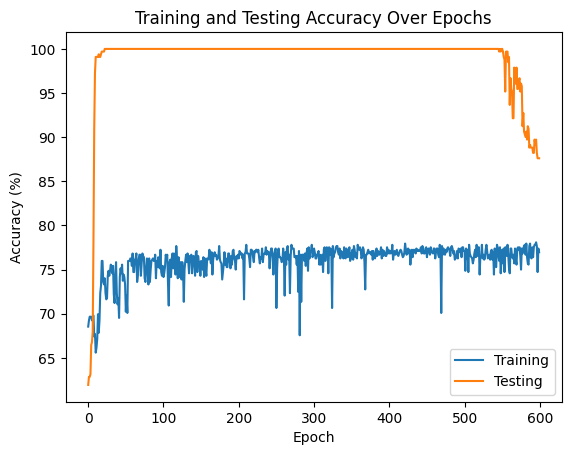

In [66]:
import pylab as pl
# Visualisasi hasil akurasi
pl.plot(perceptron.training_accuracies, label='Training')
pl.plot(perceptron.testing_accuracies, label='Testing')
pl.xlabel('Epoch')
pl.ylabel('Accuracy (%)')
pl.title('Training and Testing Accuracy Over Epochs')
pl.legend()
pl.show()

In [67]:
predictions = perceptron.predict(X_test_normalized)
print(predictions)

[0 1 0 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1
 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1
 0 1 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0
 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0
 1 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1
 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0
 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1
 1 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0]


### Epoch 750

In [68]:
class SingleLayerPerceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=750):
        self.weights = np.zeros(input_size + 1)  # Additional weight for bias
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.training_accuracies = []
        self.testing_accuracies = []

    def _activation_function(self, x):
        # Using a simple step function as the activation function
        return 1 if x >= 0 else 0

    def _predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self._activation_function(summation)

    def _calculate_accuracy(self, X, y):
        predictions = self.predict(X)
        accuracy = np.mean(predictions == y)
        return accuracy * 100

    def train(self, X_train, y_train, X_test, y_test):
        for epoch in range(self.epochs):
            for inputs, label in zip(X_train, y_train):
                prediction = self._predict(inputs)
                error = label - prediction

                # Update weights
                self.weights[1:] += self.learning_rate * error * inputs
                self.weights[0] += self.learning_rate * error
            # Calculate training accuracy at each epoch
            training_accuracy = self._calculate_accuracy(X_train, y_train)
            self.training_accuracies.append(training_accuracy)

            # Calculate testing accuracy at each epoch
            testing_accuracy = self._calculate_accuracy(X_test, y_test)
            self.testing_accuracies.append(testing_accuracy)

            # Calculate training accuracy at each epoch
            training_accuracy = self._calculate_accuracy(X_train, y_train)
            print(f"Epoch {epoch + 1}/{self.epochs}: Training Accuracy = {training_accuracy:.2f} Testing Accuracy= {testing_accuracy:.2f}%")

        # Print final training accuracy
        final_training_accuracy = self._calculate_accuracy(X_train, y_train)
        print(f"\nFinal Training Accuracy = {final_training_accuracy:.2f}%")

        # Print test accuracy
        test_accuracy = self._calculate_accuracy(X_test, y_test)
        print(f"Test Accuracy = {test_accuracy:.2f}%")

    def predict(self, X_test):
        predictions = [self._predict(inputs) for inputs in X_test]
        return np.array(predictions)

In [69]:
input_size = x_train.shape[1]
perceptron = SingleLayerPerceptron(input_size)
perceptron.train(x_train, y_train, X_test_normalized, y_test)

Epoch 1/750: Training Accuracy = 68.54 Testing Accuracy= 61.93%
Epoch 2/750: Training Accuracy = 69.24 Testing Accuracy= 62.84%
Epoch 3/750: Training Accuracy = 69.66 Testing Accuracy= 62.84%
Epoch 4/750: Training Accuracy = 69.66 Testing Accuracy= 63.14%
Epoch 5/750: Training Accuracy = 69.66 Testing Accuracy= 66.47%
Epoch 6/750: Training Accuracy = 69.24 Testing Accuracy= 66.77%
Epoch 7/750: Training Accuracy = 69.66 Testing Accuracy= 67.98%
Epoch 8/750: Training Accuracy = 69.80 Testing Accuracy= 78.25%
Epoch 9/750: Training Accuracy = 67.42 Testing Accuracy= 90.94%
Epoch 10/750: Training Accuracy = 67.70 Testing Accuracy= 97.28%
Epoch 11/750: Training Accuracy = 65.59 Testing Accuracy= 99.09%
Epoch 12/750: Training Accuracy = 66.15 Testing Accuracy= 99.09%
Epoch 13/750: Training Accuracy = 67.13 Testing Accuracy= 99.09%
Epoch 14/750: Training Accuracy = 69.94 Testing Accuracy= 99.09%
Epoch 15/750: Training Accuracy = 67.84 Testing Accuracy= 99.40%
Epoch 16/750: Training Accuracy = 

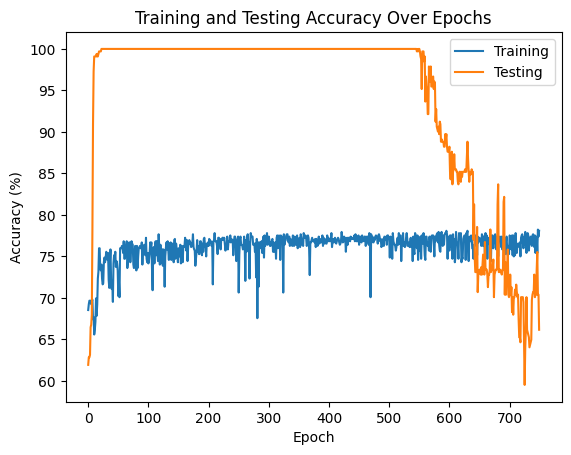

In [70]:
import pylab as pl
# Visualisasi hasil akurasi
pl.plot(perceptron.training_accuracies, label='Training')
pl.plot(perceptron.testing_accuracies, label='Testing')
pl.xlabel('Epoch')
pl.ylabel('Accuracy (%)')
pl.title('Training and Testing Accuracy Over Epochs')
pl.legend()
pl.show()

In [71]:
predictions = perceptron.predict(X_test_normalized)
print(predictions)

[0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 0 1
 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0
 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1
 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0
 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1
 1 0 1 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1
 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0]


### Epoch 1000

In [72]:
class SingleLayerPerceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=1000):
        self.weights = np.zeros(input_size + 1)  # Additional weight for bias
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.training_accuracies = []
        self.testing_accuracies = []

    def _activation_function(self, x):
        # Using a simple step function as the activation function
        return 1 if x >= 0 else 0

    def _predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self._activation_function(summation)

    def _calculate_accuracy(self, X, y):
        predictions = self.predict(X)
        accuracy = np.mean(predictions == y)
        return accuracy * 100

    def train(self, X_train, y_train, X_test, y_test):
        for epoch in range(self.epochs):
            for inputs, label in zip(X_train, y_train):
                prediction = self._predict(inputs)
                error = label - prediction

                # Update weights
                self.weights[1:] += self.learning_rate * error * inputs
                self.weights[0] += self.learning_rate * error
            # Calculate training accuracy at each epoch
            training_accuracy = self._calculate_accuracy(X_train, y_train)
            self.training_accuracies.append(training_accuracy)

            # Calculate testing accuracy at each epoch
            testing_accuracy = self._calculate_accuracy(X_test, y_test)
            self.testing_accuracies.append(testing_accuracy)

            # Calculate training accuracy at each epoch
            training_accuracy = self._calculate_accuracy(X_train, y_train)
            print(f"Epoch {epoch + 1}/{self.epochs}: Training Accuracy = {training_accuracy:.2f}%")

        # Print final training accuracy
        final_training_accuracy = self._calculate_accuracy(X_train, y_train)
        print(f"\nFinal Training Accuracy = {final_training_accuracy:.2f}%")

        # Print test accuracy
        test_accuracy = self._calculate_accuracy(X_test, y_test)
        print(f"Test Accuracy = {test_accuracy:.2f}%")

    def predict(self, X_test):
        predictions = [self._predict(inputs) for inputs in X_test]
        return np.array(predictions)

In [73]:
input_size = x_train.shape[1]
perceptron = SingleLayerPerceptron(input_size)
perceptron.train(x_train, y_train, X_test_normalized, y_test)

Epoch 1/1000: Training Accuracy = 68.54%
Epoch 2/1000: Training Accuracy = 69.24%
Epoch 3/1000: Training Accuracy = 69.66%
Epoch 4/1000: Training Accuracy = 69.66%
Epoch 5/1000: Training Accuracy = 69.66%
Epoch 6/1000: Training Accuracy = 69.24%
Epoch 7/1000: Training Accuracy = 69.66%
Epoch 8/1000: Training Accuracy = 69.80%
Epoch 9/1000: Training Accuracy = 67.42%
Epoch 10/1000: Training Accuracy = 67.70%
Epoch 11/1000: Training Accuracy = 65.59%
Epoch 12/1000: Training Accuracy = 66.15%
Epoch 13/1000: Training Accuracy = 67.13%
Epoch 14/1000: Training Accuracy = 69.94%
Epoch 15/1000: Training Accuracy = 67.84%
Epoch 16/1000: Training Accuracy = 69.24%
Epoch 17/1000: Training Accuracy = 72.33%
Epoch 18/1000: Training Accuracy = 73.17%
Epoch 19/1000: Training Accuracy = 75.98%
Epoch 20/1000: Training Accuracy = 75.98%
Epoch 21/1000: Training Accuracy = 73.60%
Epoch 22/1000: Training Accuracy = 73.31%
Epoch 23/1000: Training Accuracy = 74.02%
Epoch 24/1000: Training Accuracy = 72.33%
E

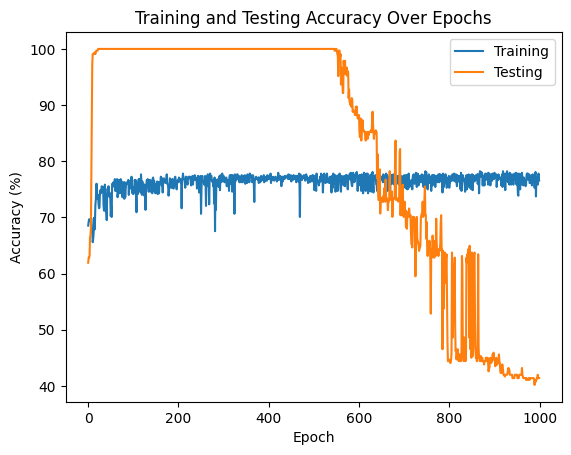

In [74]:
import pylab as pl
# Visualisasi hasil akurasi
pl.plot(perceptron.training_accuracies, label='Training')
pl.plot(perceptron.testing_accuracies, label='Testing')
pl.xlabel('Epoch')
pl.ylabel('Accuracy (%)')
pl.title('Training and Testing Accuracy Over Epochs')
pl.legend()
pl.show()

In [75]:
predictions = perceptron.predict(X_test_normalized)
print(predictions)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


### Epoch 1500

In [76]:
class SingleLayerPerceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=1500):
        self.weights = np.zeros(input_size + 1)  # Additional weight for bias
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.training_accuracies = []
        self.testing_accuracies = []

    def _activation_function(self, x):
        # Using a simple step function as the activation function
        return 1 if x >= 0 else 0

    def _predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self._activation_function(summation)

    def _calculate_accuracy(self, X, y):
        predictions = self.predict(X)
        accuracy = np.mean(predictions == y)
        return accuracy * 100

    def train(self, X_train, y_train, X_test, y_test):
        for epoch in range(self.epochs):
            for inputs, label in zip(X_train, y_train):
                prediction = self._predict(inputs)
                error = label - prediction

                # Update weights
                self.weights[1:] += self.learning_rate * error * inputs
                self.weights[0] += self.learning_rate * error
            # Calculate training accuracy at each epoch
            training_accuracy = self._calculate_accuracy(X_train, y_train)
            self.training_accuracies.append(training_accuracy)

            # Calculate testing accuracy at each epoch
            testing_accuracy = self._calculate_accuracy(X_test, y_test)
            self.testing_accuracies.append(testing_accuracy)

            # Calculate training accuracy at each epoch
            training_accuracy = self._calculate_accuracy(X_train, y_train)
            print(f"Epoch {epoch + 1}/{self.epochs}: Training Accuracy = {training_accuracy:.2f}%")

        # Print final training accuracy
        final_training_accuracy = self._calculate_accuracy(X_train, y_train)
        print(f"\nFinal Training Accuracy = {final_training_accuracy:.2f}%")

        # Print test accuracy
        test_accuracy = self._calculate_accuracy(X_test, y_test)
        print(f"Test Accuracy = {test_accuracy:.2f}%")

    def predict(self, X_test):
        predictions = [self._predict(inputs) for inputs in X_test]
        return np.array(predictions)

In [77]:
input_size = x_train.shape[1]
perceptron = SingleLayerPerceptron(input_size)
perceptron.train(x_train, y_train, X_test_normalized, y_test)

Epoch 1/1500: Training Accuracy = 68.54%
Epoch 2/1500: Training Accuracy = 69.24%
Epoch 3/1500: Training Accuracy = 69.66%
Epoch 4/1500: Training Accuracy = 69.66%
Epoch 5/1500: Training Accuracy = 69.66%
Epoch 6/1500: Training Accuracy = 69.24%
Epoch 7/1500: Training Accuracy = 69.66%
Epoch 8/1500: Training Accuracy = 69.80%
Epoch 9/1500: Training Accuracy = 67.42%
Epoch 10/1500: Training Accuracy = 67.70%
Epoch 11/1500: Training Accuracy = 65.59%
Epoch 12/1500: Training Accuracy = 66.15%
Epoch 13/1500: Training Accuracy = 67.13%
Epoch 14/1500: Training Accuracy = 69.94%
Epoch 15/1500: Training Accuracy = 67.84%
Epoch 16/1500: Training Accuracy = 69.24%
Epoch 17/1500: Training Accuracy = 72.33%
Epoch 18/1500: Training Accuracy = 73.17%
Epoch 19/1500: Training Accuracy = 75.98%
Epoch 20/1500: Training Accuracy = 75.98%
Epoch 21/1500: Training Accuracy = 73.60%
Epoch 22/1500: Training Accuracy = 73.31%
Epoch 23/1500: Training Accuracy = 74.02%
Epoch 24/1500: Training Accuracy = 72.33%
E

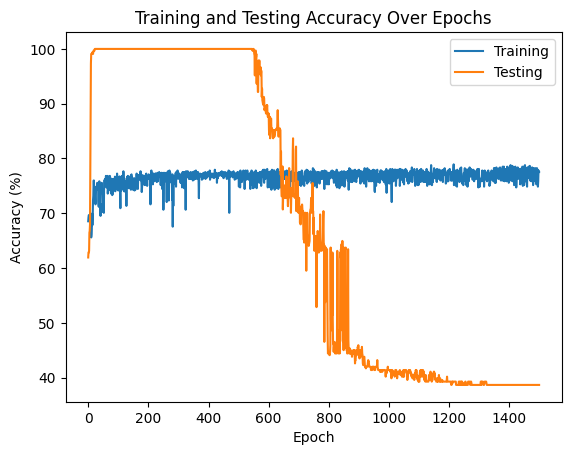

In [78]:
import pylab as pl
# Visualisasi hasil akurasi
pl.plot(perceptron.training_accuracies, label='Training')
pl.plot(perceptron.testing_accuracies, label='Testing')
pl.xlabel('Epoch')
pl.ylabel('Accuracy (%)')
pl.title('Training and Testing Accuracy Over Epochs')
pl.legend()
pl.show()

In [79]:
predictions = perceptron.predict(X_test_normalized)
print(predictions)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
